In [2]:
!pip install sentence-transformers scikit-multilearn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 897.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


from nltk import download
import nltk
nltk.download('wordnet')
nltk.download('punkt')

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.multioutput import ClassifierChain
from sklearn.metrics import accuracy_score
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
ask_ubuntu = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Intent Classification/LSTM_Intent/Dataset/AskUbuntuCorpus.json")
CBT_corpora = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Intent Classification/LSTM_Intent/Dataset/ChatbotCorpus.json")
WA_corpora = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Intent Classification/LSTM_Intent/Dataset/WebApplicationsCorpus.json")

In [ ]:
len(WA_corpora)

89

In [ ]:
ask_ubuntu["sentences"][1]['text']

'Which PDF Viewer would you recommend?'

In [5]:
def load_df(raw_df):
  """
  Loads a DataFrame containing a column of dictionaries into a new DataFrame with separate "sentences" and "intent" columns.

  Args:
      raw_df (pandas.DataFrame): The DataFrame containing a column of dictionaries.

  Returns:
      pandas.DataFrame: A new DataFrame with "sentences" and "intent" columns.
  """

  # Assuming the column name containing dictionaries is 'data' (modify if different)
  data_column = raw_df['sentences']

  sentences = []
  intent = []
  for item in data_column:
    if item is not None:  # Check for missing values in the data column
      sentences.append(item.get("text"))
      intent.append(item.get("intent"))

  loaded_df = pd.DataFrame({"sentences": sentences, "intent": intent})
  return loaded_df

In [6]:
df_1 = load_df(WA_corpora)
df_2 = load_df(CBT_corpora)
df_3 = load_df(ask_ubuntu)

In [ ]:
df_3[df_3['intent'] == 'None']



,sentences,intent
35,Is there a Document scanning and archiving sof...,None
91,How is rm command different from the delete bu...,None
93,How to provide user permission to read and wri...,None
94,Security enhancements prevent mounting /dev/sdb1,None
95,How do I show grub when resuming from suspend?,None
109,How to record my screen?,None
110,How can I highlight or annotate PDFs?,None
134,Torrent client for the command-line?,None


In [ ]:
df_1["intent"].unique()

array(['Find Alternative', 'Delete Account', 'Export Data',
       'Sync Accounts', 'None', 'Change Password', 'Filter Spam',
       'Download Video'], dtype=object)

In [ ]:
df_2["intent"].unique()

array(['FindConnection', 'DepartureTime'], dtype=object)

In [ ]:
df_3["intent"].unique()

array(['Software Recommendation', 'None', 'Shutdown Computer',
       'Make Update', 'Setup Printer'], dtype=object)

In [7]:
df = pd.concat([df_1, df_2, df_3])

In [ ]:
df

,sentences,intent
0,Alternative to Facebook,Find Alternative
1,How do I delete my Facebook account?,Delete Account
2,Are there any good Pandora alternatives with g...,Find Alternative
3,Is it possible to export my data from Trello t...,Export Data
4,Is there an online alternative to iGoogle,Find Alternative
...,...,...
157,Are there any Keyboard Shortcuts to Shutdown?,Shutdown Computer
158,Shutdown after a certain time,Shutdown Computer
159,Shutdown problem in Ubuntu 16.04,Shutdown Computer
160,How do I fix a shutdown problem?,Shutdown Computer


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Intent Classification/Dataset/combined_df_intent.csv")

In [14]:
stop_words = set('''x
y
your
yours
yourself
yourselves
you
yond
yonder
yon
ye
yet
z
zillion
j
u
umpteen
usually
us
username
uponed
upons
uponing
upon
ups
upping
upped
up
unto
until
unless
unlike
unliker
unlikest
under
underneath
use
used
usedest
r
rath
rather
rathest
rathe
re
relate
related
relatively
regarding
really
res
respecting
respectively
q
quite
que
qua
n
neither
neaths
neath
nethe
nethermost
necessary
necessariest
necessarier
never
nevertheless
nigh
nighest
nigher
nine
noone
nobody
nobodies
nowhere
nowheres
no
noes
nor
nos
no-one
none
notwithstanding
nothings
nothing
nathless
natheless
t
ten
tills
till
tilled
tilling
to
towards
toward
towardest
towarder
together
too
thy
thyself
thus
than
that
those
thou
though
thous
thouses
thoroughest
thorougher
thorough
thoroughly
thru
thruer
thruest
thro
through
throughout
throughest
througher
thine
this
thises
they
thee
the
then
thence
thenest
thener
them
themselves
these
therer
there
thereby
therest
thereafter
therein
thereupon
therefore
their
theirs
thing
things
three
two
o
oh
owt
owning
owned
own
owns
others
other
otherwise
otherwisest
otherwiser
of
often
oftener
oftenest
off
offs
offest
one
ought
oughts
our
ours
ourselves
ourself
out
outest
outed
outwith
outs
outside
over
overallest
overaller
overalls
overall
overs
or
orer
orest
on
oneself
onest
ons
onto
a
atween
at
athwart
atop
afore
afterward
afterwards
after
afterest
afterer
ain
an
any
anything
anybody
anyone
anyhow
anywhere
anent
anear
and
andor
another
around
ares
are
aest
aer
against
again
accordingly
abaft
abafter
abaftest
abovest
above
abover
abouter
aboutest
about
aid
amidst
amid
among
amongst
apartest
aparter
apart
appeared
appears
appear
appearing
appropriating
appropriate
appropriatest
appropriates
appropriater
appropriated
already
always
also
along
alongside
although
almost
all
allest
aller
allyou
alls
albeit
awfully
as
aside
asides
aslant
ases
astrider
astride
astridest
astraddlest
astraddler
astraddle
availablest
availabler
available
aughts
aught
vs
v
variousest
variouser
various
via
vis-a-vis
vis-a-viser
vis-a-visest
viz
very
veriest
verier
versus
k
g
go
gone
good
got
gotta
gotten
get
gets
getting
b
by
byandby
by-and-by
bist
both
but
buts
be
beyond
because
became
becomes
become
becoming
becomings
becominger
becomingest
behind
behinds
before
beforehand
beforehandest
beforehander
bettered
betters
better
bettering
betwixt
between
beneath
been
below
besides
beside
m
my
myself
mucher
muchest
much
must
musts
musths
musth
main
make
mayest
many
mauger
maugre
me
meanwhiles
meanwhile
mostly
most
moreover
more
might
mights
midst
midsts
h
huh
humph
he
hers
herself
her
hereby
herein
hereafters
hereafter
hereupon
hence
hadst
had
having
haves
have
has
hast
hardly
hae
hath
him
himself
hither
hitherest
hitherer
his
how-do-you-do
however
how
howbeit
howdoyoudo
hoos
hoo
w
woulded
woulding
would
woulds
was
wast
we
wert
were
with
withal
without
within
why
what
whatever
whateverer
whateverest
whatsoeverer
whatsoeverest
whatsoever
whence
whencesoever
whenever
whensoever
when
whenas
whether
wheen
whereto
whereupon
wherever
whereon
whereof
where
whereby
wherewithal
wherewith
whereinto
wherein
whereafter
whereas
wheresoever
wherefrom
which
whichever
whichsoever
whilst
while
whiles
whithersoever
whither
whoever
whosoever
whoso
whose
whomever
s
syne
syn
shalling
shall
shalled
shalls
shoulding
should
shoulded
shoulds
she
sayyid
sayid
said
saider
saidest
same
samest
sames
samer
saved
sans
sanses
sanserifs
sanserif
so
soer
soest
sobeit
someone
somebody
somehow
some
somewhere
somewhat
something
sometimest
sometimes
sometimer
sometime
several
severaler
severalest
serious
seriousest
seriouser
senza
send
sent
seem
seems
seemed
seemingest
seeminger
seemings
seven
summat
sups
sup
supping
supped
such
since
sine
sines
sith
six
stop
stopped
p
plaintiff
plenty
plenties
please
pleased
pleases
per
perhaps
particulars
particularly
particular
particularest
particularer
pro
providing
provides
provided
provide
probably
l
layabout
layabouts
latter
latterest
latterer
latterly
latters
lots
lotting
lotted
lot
lest
less
ie
ifs
if
i
info
information
itself
its
it
is
idem
idemer
idemest
immediate
immediately
immediatest
immediater
in
inwards
inwardest
inwarder
inward
inasmuch
into
instead
insofar
indicates
indicated
indicate
indicating
indeed
inc
f
fact
facts
fs
figupon
figupons
figuponing
figuponed
few
fewer
fewest
frae
from
failing
failings
five
furthers
furtherer
furthered
furtherest
further
furthering
furthermore
fourscore
followthrough
for
forwhy
fornenst
formerly
former
formerer
formerest
formers
forbye
forby
fore
forever
forer
fores
four
d
ddays
dday
do
doing
doings
doe
does
doth
downwarder
downwardest
downward
downwards
downs
done
doner
dones
donest
dos
dost
did
differentest
differenter
different
describing
describe
describes
described
despiting
despites
despited
despite
during
c
cum
circa
chez
cer
certain
certainest
certainer
cest
canst
cannot
cant
cants
canting
cantest
canted
co
could
couldst
comeon
comeons
come-ons
come-on
concerning
concerninger
concerningest
consequently
considering
e
eg
eight
either
even
evens
evenser
evensest
evened
evenest
ever
everyone
everything
everybody
everywhere
every
ere
each
et
etc
elsewhere
else
ex
excepted
excepts
except
excepting
exes
enough'''.split())

In [15]:
lemmatizer=WordNetLemmatizer()

def preprocess_text(text):
  """
  This function cleans and preprocesses text data.

  Args:
      text: The text string to be preprocessed.

  Returns:
      The preprocessed text string.
  """

  text = re.sub('<.*?>', ' ', text)  # removal of html characters
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = text.lower().strip()  # Lowercase and remove leading/trailing whitespace
  text = re.sub(r"[^\w\s]", " ", text)  # Replace non-alphanumeric characters with spaces
  text = re.sub(r"\s+", " ", text)
  text = re.sub("\n", " ", text)  # remove new lines
  text = re.sub("\s\s+", " ", text)  # remove consecutive white spaces
  tokens = word_tokenize(text)  # Tokenize
  filtered_tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
  lst = []
  for word in filtered_tokens:
    lst.append(lemmatizer.lemmatize(word))
  cleaned_text = ' '.join(lst)
  return cleaned_text

In [16]:
sentences_cleaned = df['sentences'].apply(lambda x: preprocess_text(str(x)))

In [17]:
sentences_cleaned

0                            alternative facebook
1                         delete facebook account
2        pandora alternative general availability
3                possible export data trello back
4                      online alternative igoogle
                          ...                    
157                    keyboard shortcut shutdown
158                                 shutdown time
159                 shutdown problem ubuntu 16 04
160                          fix shutdown problem
161    graphical utility can ubuntu auto shutdown
Name: sentences, Length: 457, dtype: object

In [18]:
sentences_cleaned_string = " ".join(sentences_cleaned)

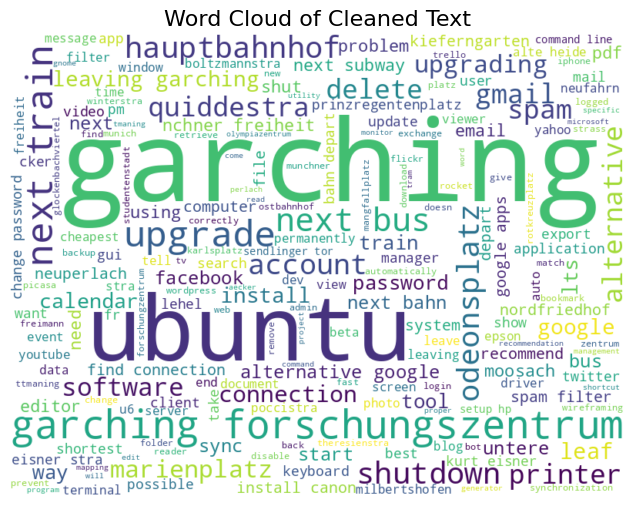

In [19]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", width=800, height=600).generate(sentences_cleaned_string)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Text", fontsize=16)
plt.show()


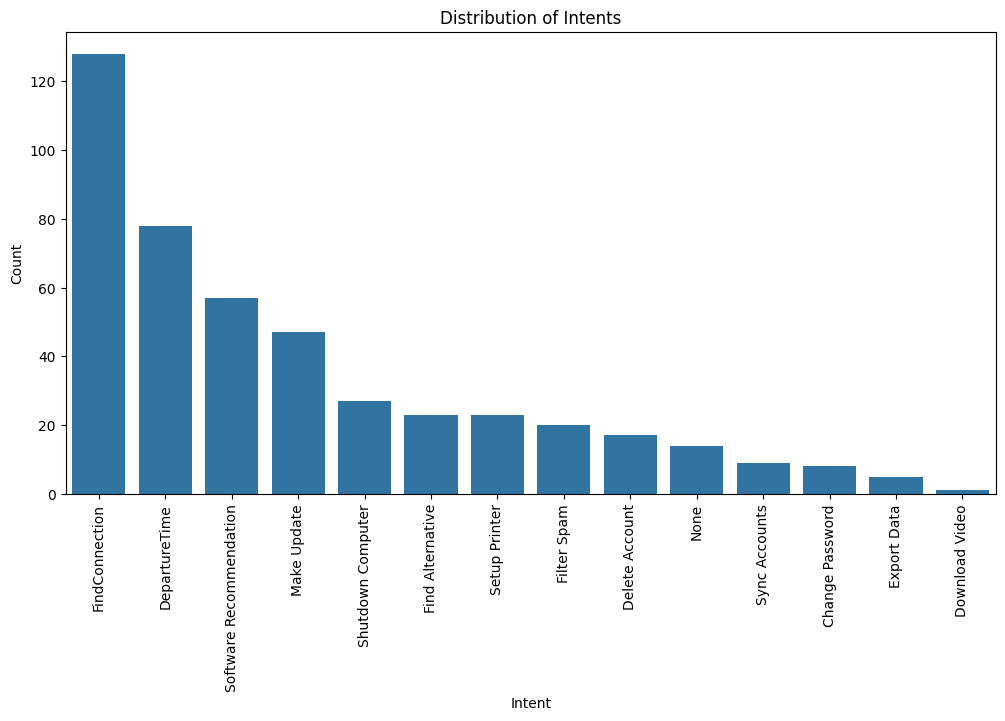

In [22]:
intent_counts = df['intent'].value_counts()

# Create a bar plot to visualize the intent distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=intent_counts.index, y=intent_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Intents')
plt.xlabel('Intent')
plt.ylabel('Count')
plt.show()

In [23]:
X = sentences_cleaned

In [24]:
y = df['intent']

In [25]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# def get_comment_vector(comment, model):
#   """
#   This function takes a comment (string) and a FastText model as input and returns a single vector representing the average word embedding for the entire comment.
#   """
#   print(f"Comment: {comment}")
#   word_vectors = model.encode(comment)

#   return word_vectors


In [ ]:
# def vectorize_sentence(sentence, tfidf_vectorizer):
#     """
#     Vectorizes a single sentence using TF-IDF.

#     Parameters:
#         sentence (str): The input sentence to be vectorized.
#         tfidf_vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on training data.

#     Returns:
#         vectorized_sentence (scipy.sparse.csr.csr_matrix): The vectorized representation of the input sentence.
#     """
#     # Transform the sentence using the provided TF-IDF vectorizer
#     vectorized_sentence = tfidf_vectorizer.fit_transform([sentence])

#     return vectorized_sentence

In [26]:
sentence_vectors = model.encode(X.tolist(), show_progress_bar = True)

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
sentence_vectors.shape

(457, 384)

In [ ]:
y.shape

(457, 1)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop = "first", sparse = False, dtype = np.int32)

# y = encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
X = sentence_vectors

In [28]:
X.shape

(457, 384)

In [29]:
print(y.shape)

(457,)


In [ ]:
# X = np.asarray(X)
# y = np.asarray(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
y_train

17            Find Alternative
66               Sync Accounts
115                Make Update
25     Software Recommendation
31               Sync Accounts
                ...           
17               DepartureTime
181             FindConnection
53                 Make Update
140    Software Recommendation
13              FindConnection
Name: intent, Length: 365, dtype: object

In [ ]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 14


## Logistic Regression using ClassiferChain

In [32]:
model_reg = LogisticRegression(max_iter=1000)
model_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Make predictions on the testing data
# y_pred = model_reg.predict(X_test)
# Evaluate the model performance using metrics like accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust averaging if needed
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust averaging if needed
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust averaging if needed

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9021739130434783
Precision: 0.8772567287784677
Recall: 0.9021739130434783
F1-Score: 0.8865044333268522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test

In [ ]:
y_pred

In [34]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Linear SVM': LinearSVC(random_state=42),
    # 'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Multi-layer Perceptron': MLPClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

for model_name, model_type in models.items():
    model_type.fit(X_train, y_train)

    y_pred = model_type.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{model_name} Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Results:
Accuracy: 0.8586956521739131
Precision: 0.8402105458741613
Recall: 0.8586956521739131
F1-Score: 0.8360099474572438



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear SVM Results:
Accuracy: 0.8913043478260869
Precision: 0.874927536231884
Recall: 0.8913043478260869
F1-Score: 0.880063209494324



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Gradient Boosting Results:
Accuracy: 0.7282608695652174
Precision: 0.8305066216891553
Recall: 0.7282608695652174
F1-Score: 0.7119089064741239

Decision Tree Results:
Accuracy: 0.5978260869565217
Precision: 0.6172939141331589
Recall: 0.5978260869565217
F1-Score: 0.5994833751955192



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi-layer Perceptron Results:
Accuracy: 0.9021739130434783
Precision: 0.8702221691352124
Recall: 0.9021739130434783
F1-Score: 0.883426571747438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost Results:
Accuracy: 0.391304347826087
Precision: 0.3138716356107661
Recall: 0.391304347826087
F1-Score: 0.3109267734553775

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46598
[LightGBM] [Info] Number of data points in the train set: 365, number of used features: 384
[LightGBM] [Info] Start training from score -3.953987
[LightGBM] [Info] Start training from score -3.334948
[LightGBM] [Info] Start training from score -1.680390
[LightGBM] [Info] Start training from score -5.899897
[LightGBM] [Info] Start training from score -4.290459
[LightGBM] [Info] Start training from score -3.260840
[LightGBM] [Info] Start training from score -3.334948
[LightGBM] [Info] Start training from score -1.245937
[LightGBM] [Info] Start training from score -2.236336
[LightGBM] [Info] Start training from score -3.597312
[LightGBM] [Info] Start training from s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
sample = ["I want to delete my account."]

In [38]:
sample_vector = transform_data(sample, model)

In [39]:
sample_prediction = model_reg.predict(sample_vector)

In [40]:
print(sample_prediction)

['Delete Account']


In [37]:
def transform_data(sentence, model):
    """
    This function transforms the input data (X) using text pre-processing and word embedding.

    Args:
        sentence (list): A list of text strings (comments).
        model (FastText): A pre-trained FastText model.

    Returns:
        numpy.ndarray: A 2D numpy array where each row represents a comment vector.
    """
    processed_text = []
    for comment in sentence:
        # Pre-process the text using preprocess_text function
        preprocessed_comment = preprocess_text(comment)
        processed_text.append(preprocessed_comment)

    # Get comment vectors using get_comment_vector function
    sentence_vectors = model.encode(processed_text)

    return sentence_vectors


In [ ]:
y_test.shape

In [ ]:
joblib.dump(model_reg, '/content/drive/MyDrive/Colab Notebooks/Intent Classification/LSTM_Intent/reg_model.pkl')

In [54]:
sample1 = ["What time does the Japan to India Flight leave?"]

In [55]:
sample1_vector = transform_data(sample1, model)

In [56]:
sample1_prediction = model_reg.predict(sample1_vector)

In [57]:
sample1_prediction

array(['DepartureTime'], dtype=object)